In [1]:
# Load dependencies
import pandas as pd
import numpy as np
from scipy.stats import gmean
import matplotlib.pyplot as plt
%matplotlib inline
import sys
sys.path.insert(0, '../statistics_helper/')
from CI_helper import *
from excel_utils import *

# Quantifying the probability of plant biomass being higher than bacterial biomass
In order to quantify the probability of plants having more biomass than bacteria, we randomly sample from the distribution of our estimates for the biomass of plants and bacteria.

In [2]:
# Load results
results = pd.read_excel('../results.xlsx','Table1 & Fig1',index_col=[0,1])

bacteria_mean = results.loc[('Bacteria','Terrestrial deep subsurface'),'Total biomass [Gt C]']
bacteria_CI = results.loc[('Bacteria','Terrestrial deep subsurface'),'Total uncertainty']

plant_mean = results.loc[('Plants','Plants'),'Biomass [Gt C]']
plant_CI = results.loc[('Plants','Plants'),'Total uncertainty']

# Sample 100000 times from the distribution of our estimates for the biomass of plants and bacteria
sample_size = 100000
bacteria = np.random.lognormal(mean = np.log(bacteria_mean), sigma = np.log(bacteria_CI)/1.96,size=sample_size).reshape([1,-1])    
plants = np.random.lognormal(mean = np.log(plant_mean), sigma = np.log(plant_CI)/1.96,size=sample_size).reshape([1,-1])    

# Calculate the probability of plant biomass being higher than that of bacteria
p_val = (plants > bacteria).sum()/sample_size

print('The probability of plants having more biomass than bacteria is ≈%.2f' %p_val + '%')

The probability of plants having more biomass than bacteria is ≈0.00%


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in greater
  app.launch_new_instance()


0.9027

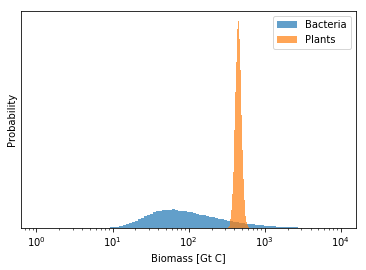

In [54]:
means = results.loc['Bacteria','Biomass [Gt C]']
mul_CIs = results.loc['Bacteria','Uncertainty']
sample = lambda x,y: np.random.lognormal(mean = np.log(x), sigma = np.log(y)/1.96,size=sample_size).reshape([-1,1])    
result = np.empty([sample_size,4])
for x,ind in enumerate(means.index):
    result[:,x:x+1] = sample(means.loc[ind],mul_CIs.loc[ind])
    
bac_sum = result.sum(axis=1)

bins = 10**(np.linspace(0,4,1000))
weights = np.ones(100000)/sample_size

bins2 = 10**(np.linspace(0,4,100))
weights2 = np.ones(100000)/sample_size/10


axes = plt.hist(bac_sum,bins=bins2,weights=weights2,alpha=0.7)
plants = sample(results.loc[('Plants','Plants'),'Biomass [Gt C]'],results.loc[('Plants','Plants'),'Total uncertainty'])
r = plt.hist(plants[:,0],bins=bins,weights=weights,alpha=0.7)
plt.legend(['Bacteria', 'Plants'])
plt.xscale('log')
plt.xlabel('Biomass [Gt C]')
plt.ylabel('Probability')
plt.gca().set_yticks([])
plt.savefig('Figure.png',dpi=300)
(bac_sum < plants[:,0]).sum()/sample_size
